# Proyecto
Integrantes:
- Joselito Ordoñez
- Carlos Tandazo
- Andrés Jimenez
## Dataset Auto-mpg

Link Kaggle de la data: https://www.kaggle.com/code/johnybhiduri/auto-mpg-clustering/input

Data procesada: [Analisis y visualización de datos](https://utpl-my.sharepoint.com/:f:/g/personal/catandazo3_utpl_edu_ec/EsfnMq4MxcZDkWYu0vXYqqYB4bCmr17dyeWHdQIOscOK8g?e=9hqeSs)

Los datos se refieren al consumo de combustible en ciclo urbano en millas por galón, a predecir en términos de 3 atributos multivaluados discretos y 5 continuos.
* Número de instancias: 398

* Número de atributos: 9 incluido el atributo de clase

**Información de atributos:**

1. mpg: continuo
2. cilindros: multivaluado discreto
3. cilindrada: continua
4. potencia: continua
5. peso: continuo
6. aceleración: continua
7. año del modelo: multivaluado discreto
8. origen: multivaluado discreto
9. nombre del coche: cadena (única para cada caso)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('..')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import copy

data = pd.read_csv('/content/drive/MyDrive/GoogleColab/Datas/AnalisisDatos/auto-mpg.csv', delimiter =',', encoding = 'unicode_escape',)

# EDA

In [3]:
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [5]:
print("\nDescripción estadística del dataset:")
data.describe()


Descripción estadística del dataset:


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<Figure size 1200x1000 with 0 Axes>

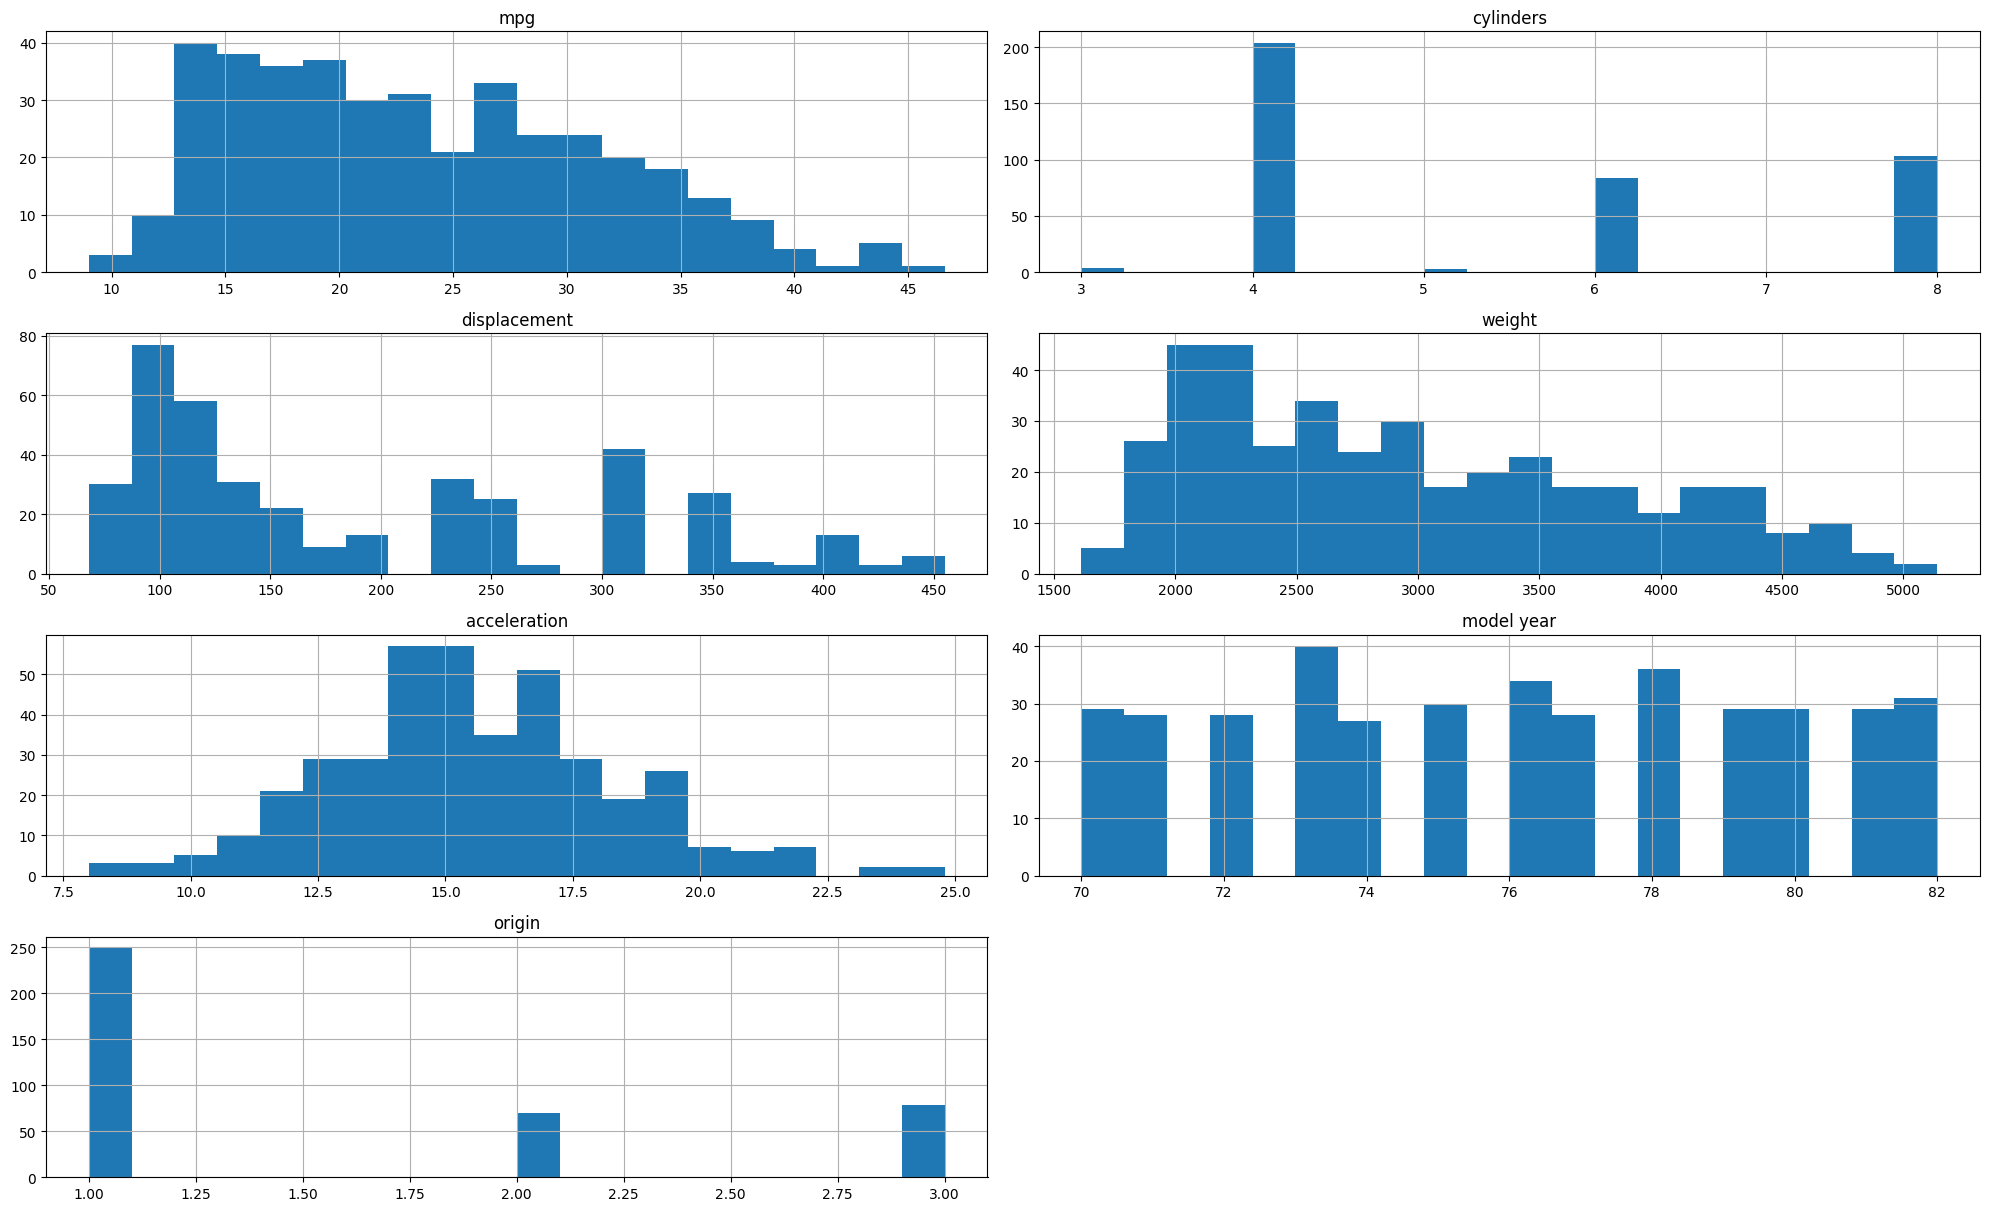

In [6]:
# Distribución de variables numéricas
plt.figure(figsize=(12, 10))
data.hist(bins=20, figsize=(20, 15), layout=(5, 2))
plt.tight_layout()
plt.show()

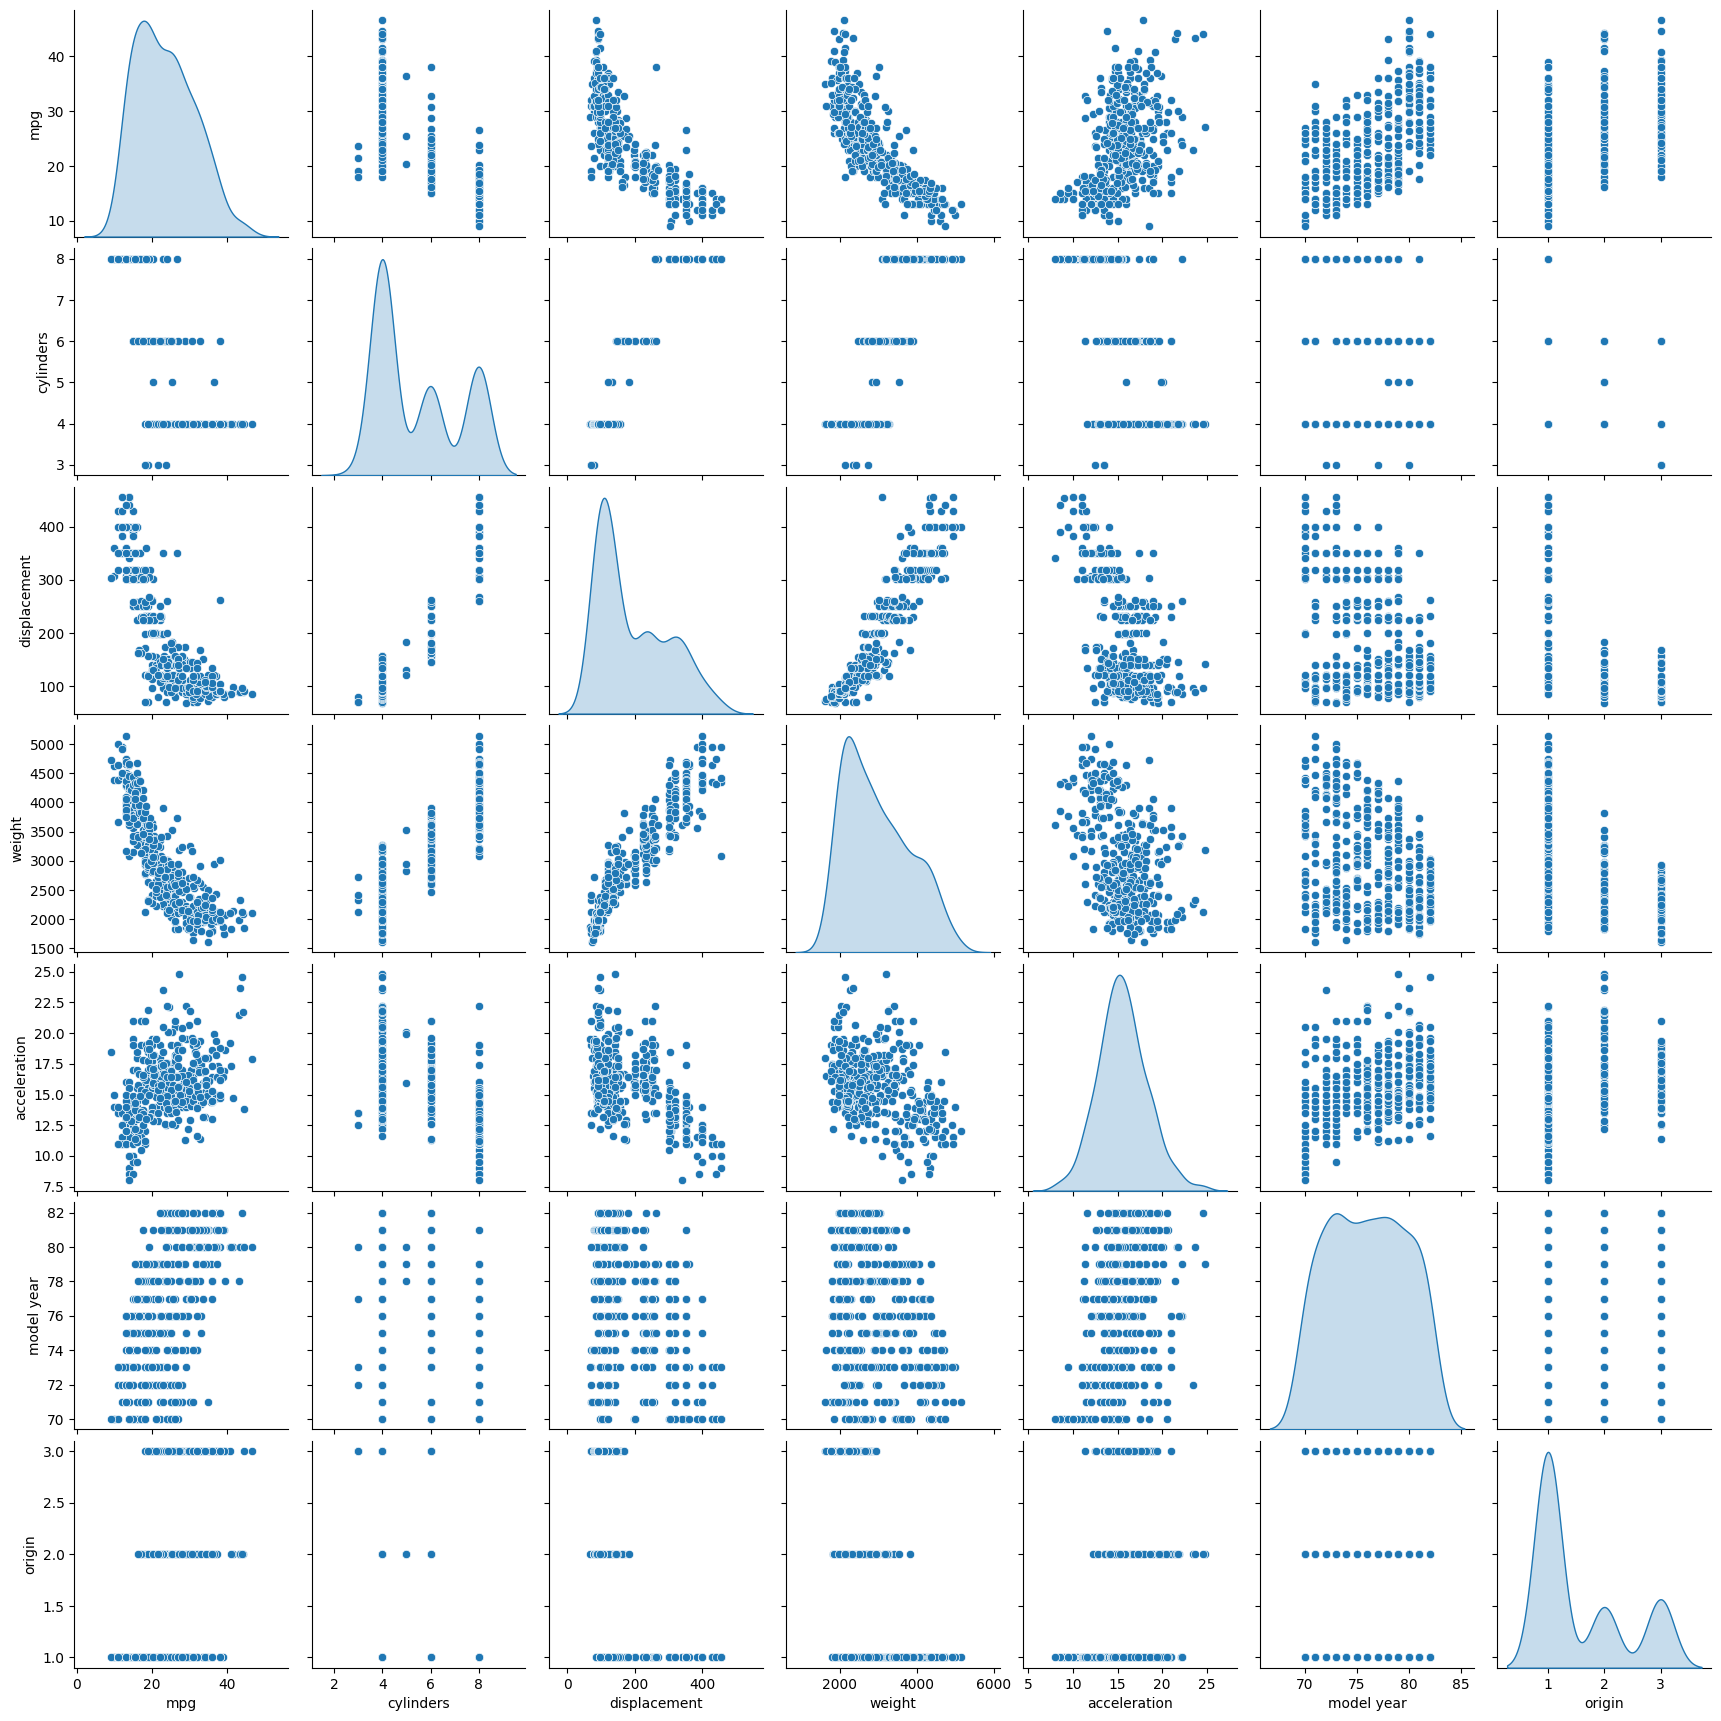

In [7]:
# Relación entre variables
sns.pairplot(data, diag_kind='kde')
plt.show()

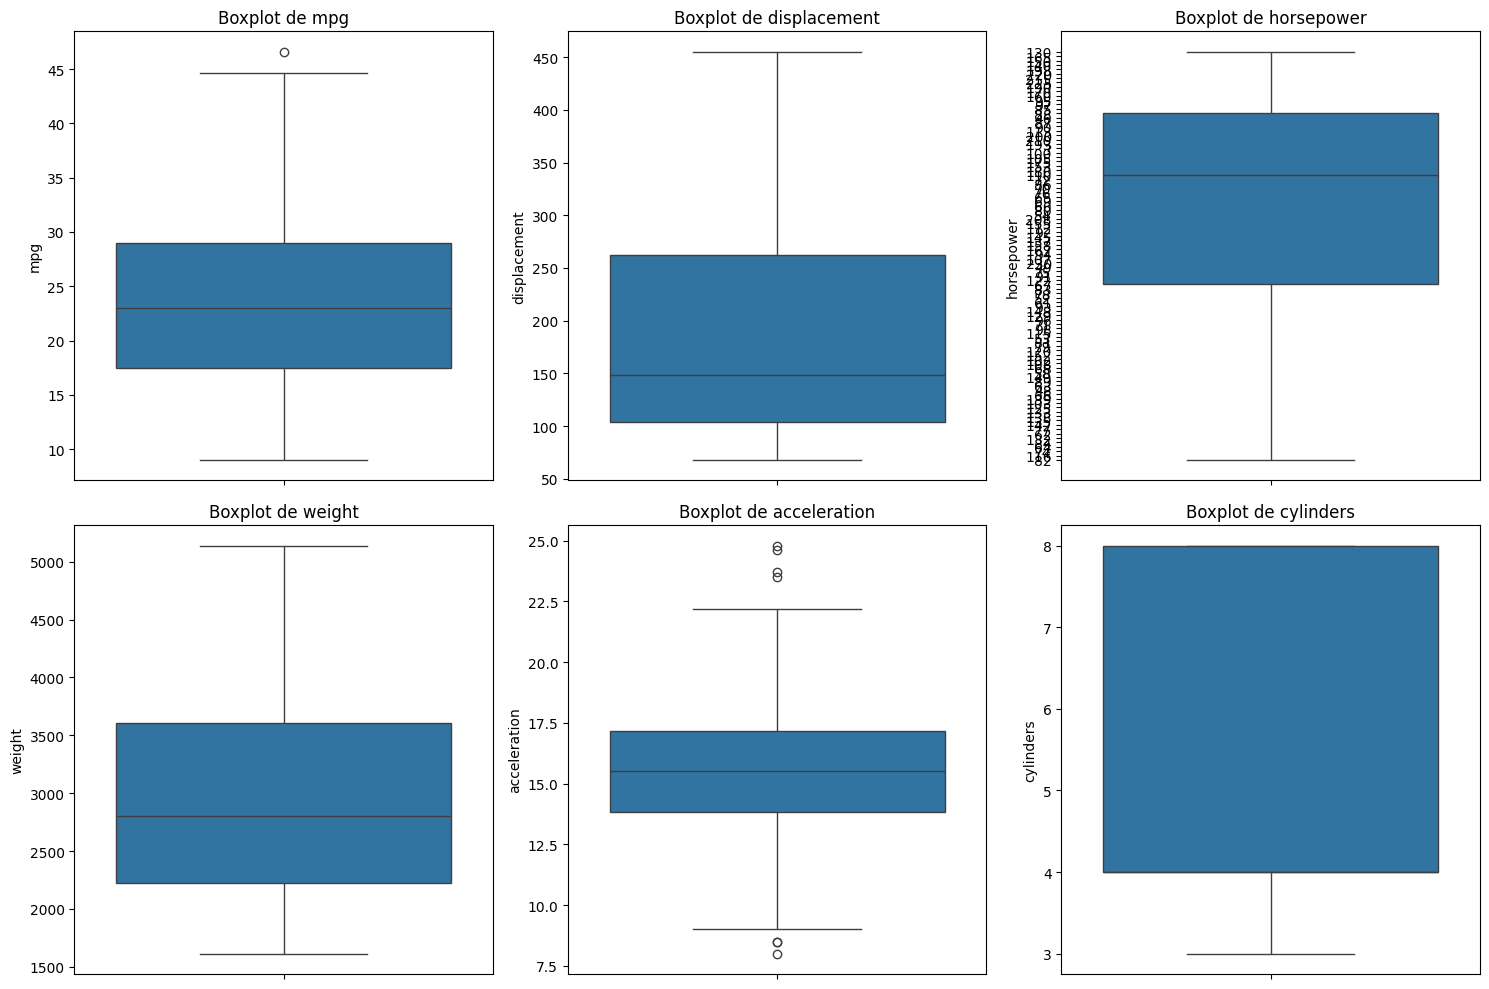

In [8]:
# Identificar variables numéricas
numerical_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']

# Crear boxplots para cada variable numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [12]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

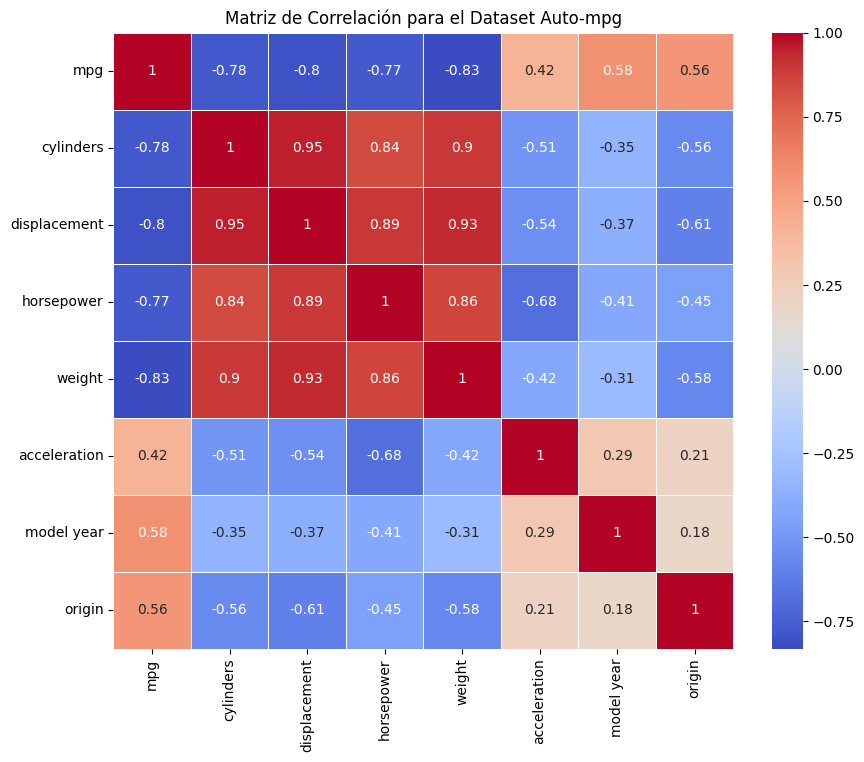

In [13]:
# Crear la gráfica de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación para el Dataset Auto-mpg')
plt.show()

# PRE PROCESAMIENTO Y LIMPIEZA DE LOS DATOS

In [9]:
# Rellenar valores nulos
# 'horsepower' tiene valores nulos, podemos reemplazarlos con la media
data['horsepower'] = data['horsepower'].replace('?', np.nan)
data['horsepower'] = data['horsepower'].astype(float)
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

In [10]:
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [11]:
# Eliminar variable car name
data.drop(['car name', ], axis=1, inplace=True)

In [14]:
# Eliminación de filas con valores atípicos en 'mpg'
# Definir los límites para los valores atípicos usando el método IQR
Q1 = data['mpg'].quantile(0.25)
Q3 = data['mpg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_mpg = Q1 - 1.5 * IQR
upper_bound_mpg = Q3 + 1.5 * IQR

In [15]:
# Eliminación de filas con valores atípicos en 'acceleration'
# Definir los límites para los valores atípicos usando el método IQR
Q1_acc = data['acceleration'].quantile(0.25)
Q3_acc = data['acceleration'].quantile(0.75)
IQR_acc = Q3_acc - Q1_acc
lower_bound_acc = Q1_acc - 1.5 * IQR_acc
upper_bound_acc = Q3_acc + 1.5 * IQR_acc

In [16]:
# Filtrar filas que están dentro de los límites definidos
cleaned_data = data[(data['mpg'] >= lower_bound_mpg) & (data['mpg'] <= upper_bound_mpg) &
                    (data['acceleration'] >= lower_bound_acc) & (data['acceleration'] <= upper_bound_acc)]

In [17]:
# Comprobamos la cantidad de filas eliminadas
rows_removed = len(data) - len(cleaned_data)
print(f"Número de filas eliminadas debido a valores atípicos en 'mpg' y 'acceleration': {rows_removed}")

Número de filas eliminadas debido a valores atípicos en 'mpg' y 'acceleration': 8


In [18]:
# Eliminamos posibles duplicados
cleaned_data.drop_duplicates(inplace=True)

<ipython-input-18-e5d6edd59cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop_duplicates(inplace=True)


In [19]:
# Mostrar información sobre el conjunto de datos limpio
print("\nInformación del conjunto de datos limpio:")
print(cleaned_data.info())


Información del conjunto de datos limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           390 non-null    float64
 1   cylinders     390 non-null    int64  
 2   displacement  390 non-null    float64
 3   horsepower    390 non-null    float64
 4   weight        390 non-null    int64  
 5   acceleration  390 non-null    float64
 6   model year    390 non-null    int64  
 7   origin        390 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.4 KB
None


In [20]:
# Guardar el dataset procesado
cleaned_data.to_csv("/content/drive/MyDrive/GoogleColab/Datas/AnalisisDatos/auto-mpg-procesado.csv", index=False)

# MODELADO

## Dividir datos de entrenamiento y testeo

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Dividir los datos en características (X) y etiquetas (y)
X = cleaned_data.drop('mpg', axis=1)
y = cleaned_data['mpg']

In [23]:
# Crear bins para stratificar
y_bins = pd.cut(y, bins=10, labels=False)

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)

In [25]:
# Verificar la distribución de los datos para asegurar la estratificación
print("Distribución en el conjunto de entrenamiento:")
print(pd.cut(y_train, bins=10).value_counts().sort_index())
print("\nDistribución en el conjunto de prueba:")
print(pd.cut(y_test, bins=10).value_counts().sort_index())

Distribución en el conjunto de entrenamiento:
mpg
(9.965, 13.46]    28
(13.46, 16.92]    43
(16.92, 20.38]    58
(20.38, 23.84]    37
(23.84, 27.3]     52
(27.3, 30.76]     32
(30.76, 34.22]    31
(34.22, 37.68]    19
(37.68, 41.14]     9
(41.14, 44.6]      3
Name: count, dtype: int64

Distribución en el conjunto de prueba:
mpg
(8.968, 12.25]     3
(12.25, 15.5]     10
(15.5, 18.75]     11
(18.75, 22.0]     14
(22.0, 25.25]      7
(25.25, 28.5]     11
(28.5, 31.75]      9
(31.75, 35.0]      7
(35.0, 38.25]      3
(38.25, 41.5]      3
Name: count, dtype: int64


## Modelo Arbol de decisión (Regresión)

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
# Definir el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

In [28]:
# Definir los parámetros para el Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [29]:
# Configurar el Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [30]:
# Entrenar el modelo con Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [31]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [32]:
# Entrenar el modelo final con los mejores hiperparámetros
best_model = grid_search.best_estimator_

In [33]:
# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

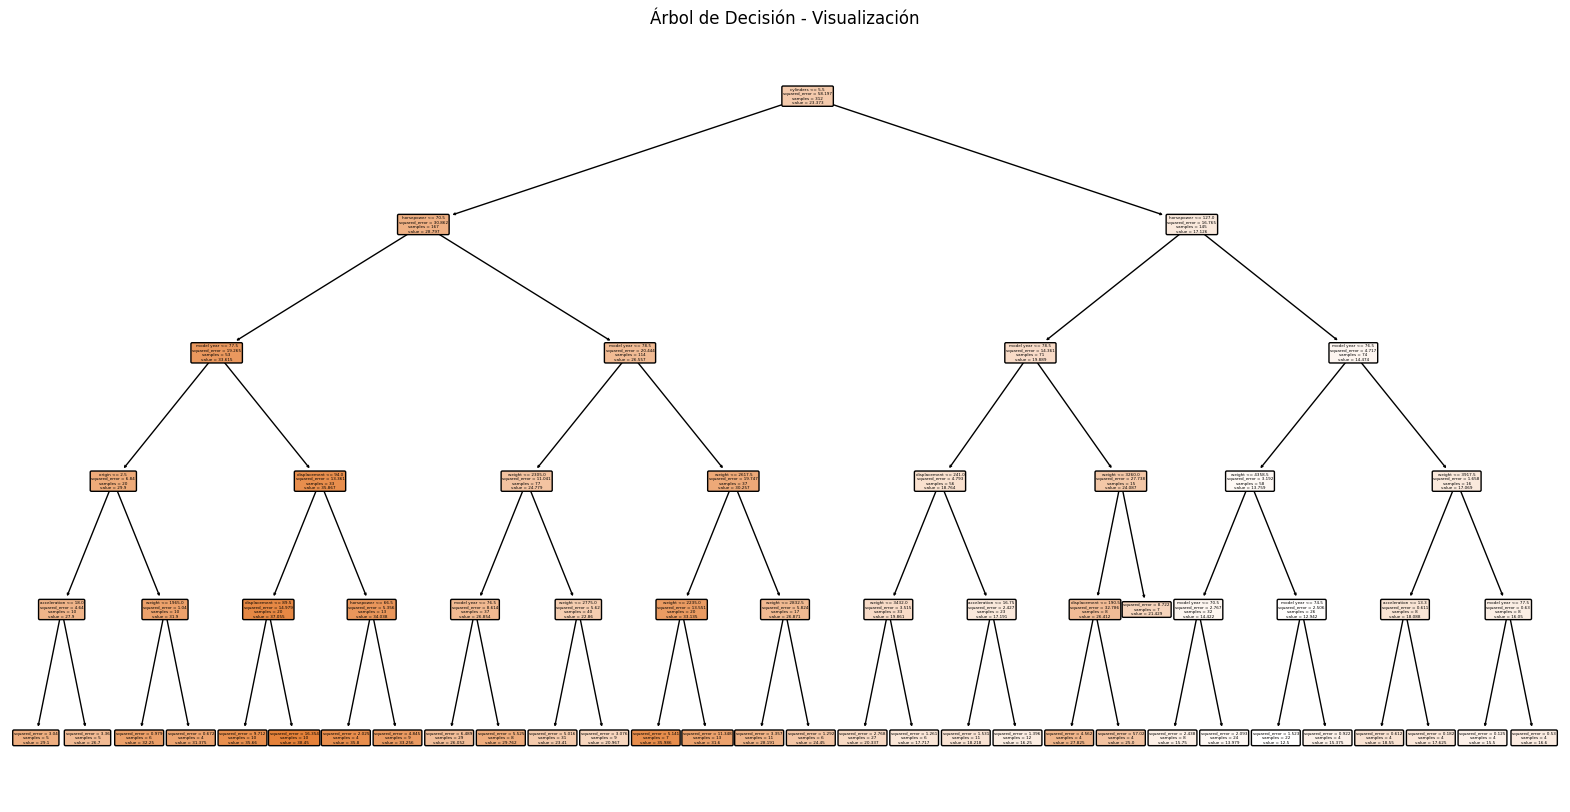

In [34]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árbol de Decisión - Visualización')
plt.show()

In [36]:
# Crear un DataFrame con las predicciones y los valores reales
df = pd.DataFrame({'test_Y': y_test, 'pred_Y': y_pred})
print(df.head())

     test_Y     pred_Y
231    15.5  15.500000
361    25.4  27.825000
158    16.0  15.375000
243    21.5  23.409677
54     35.0  32.250000




---


Observamos que el DataFrame indica los valores reales y la predicciones del modelo, y se puede ver que las predicciones del modelo son cercanas a los valores reales en varios caso, por ejemplo, en el índice 231, el valor real es 15.5 y la predicción es exactamente 15.5. Por otra parte, el índice 243 muestra que el valor real es de 21.5 y la predicción es 23.41, mostrando una ligera desviación.


---



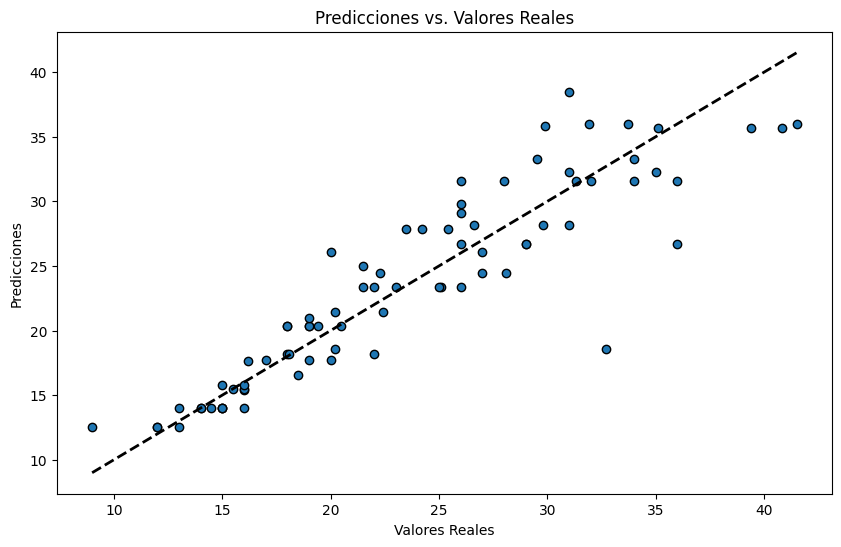

In [37]:
# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

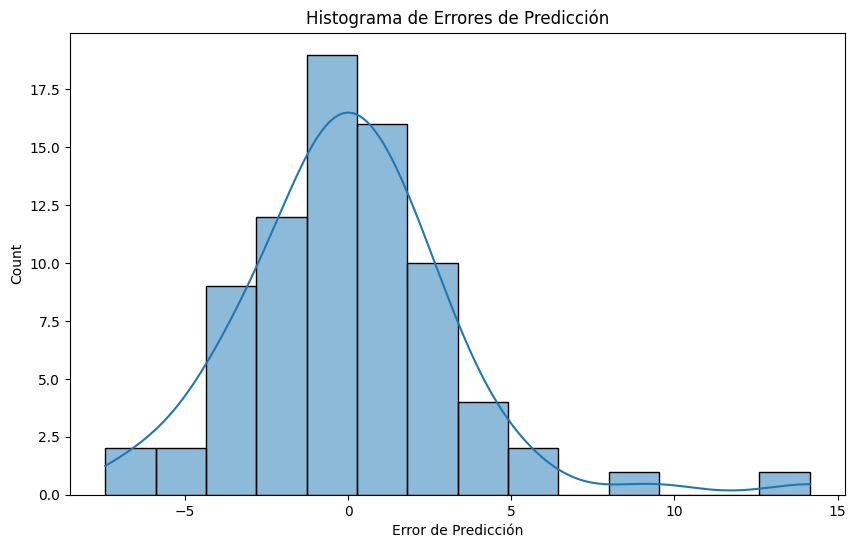

In [38]:
# Graficar el histograma de los errores de predicción
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error de Predicción')
plt.title('Histograma de Errores de Predicción')
plt.show()

## Modelo Regresion Lineal Múltiple

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Definir el modelo de regresión lineal múltiple
model = LinearRegression()

In [41]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [44]:
# Crear un DataFrame con las predicciones y los valores reales
df = pd.DataFrame({'test_Y': y_test, 'pred_Y': y_pred})
print(df.head())

     test_Y     pred_Y
231    15.5  15.561729
361    25.4  28.595079
158    16.0  12.361864
243    21.5  26.703539
54     35.0  29.160900




---


Se puede ver que las predicciones del modelo son cercanas a los valores reales en varios caso, por ejemplo, en el índice 231, el valor real es 15.5 y la predicción es muy cercana a 15.5. Por otra parte, el índice 243 muestra que el valor real es de 21.5 y la predicción es 26.70, mostrando una ligera desviación.


---



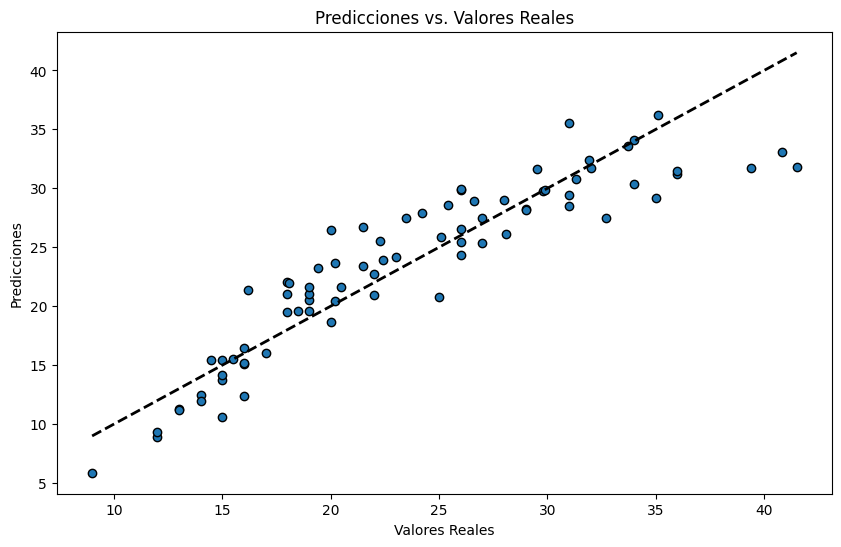

In [45]:
# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

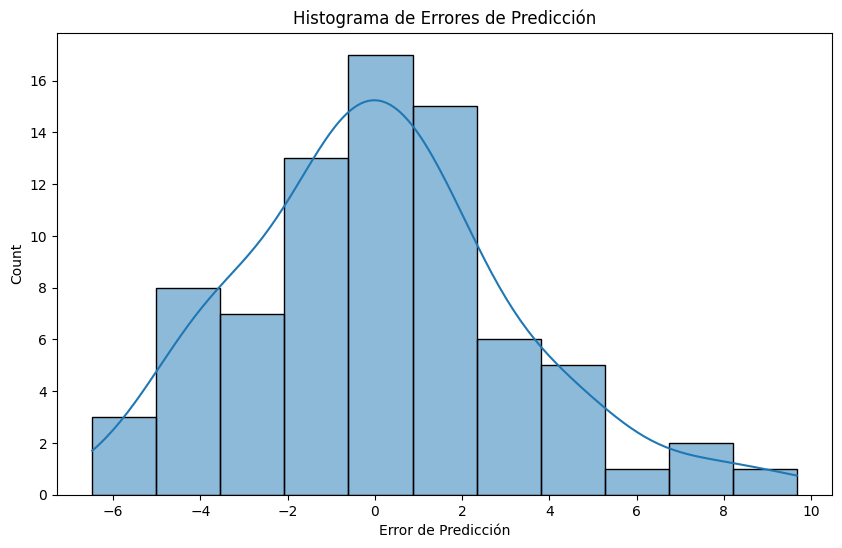

In [46]:
# Graficar el histograma de los errores de predicción
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error de Predicción')
plt.title('Histograma de Errores de Predicción')
plt.show()

## Modelo Naive Bayes (Clasificación)

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [48]:
# Discretizar 'mpg' en intervalos
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
cleaned_data['mpg_category'] = discretizer.fit_transform(cleaned_data['mpg'].values.reshape(-1, 1))

<ipython-input-48-054c5b6f785f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['mpg_category'] = discretizer.fit_transform(cleaned_data['mpg'].values.reshape(-1, 1))


In [49]:
# Ver los valores de mpg_category
col_mpg_category = cleaned_data['mpg_category'].unique()
print(col_mpg_category)

[0. 1. 2.]


In [50]:
# Dividir los datos en características (X) y etiquetas (y)
X = cleaned_data.drop(['mpg', 'mpg_category'], axis=1)
y = cleaned_data['mpg_category']

In [51]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Crear y entrenar el modelo Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [53]:
# Predecir en el conjunto de prueba
y_pred_nb = nb_classifier.predict(X_test)

In [54]:
# Crear un dataframe con las predicciones y los valores reales
df = pd.DataFrame()
df['test_Y'] = y_test
df['pred_Y'] = y_pred_nb

In [55]:
print(df.head())

     test_Y  pred_Y
12      0.0     0.0
45      0.0     0.0
36      0.0     0.0
316     0.0     0.0
276     1.0     1.0



---


Se puede ver que las predicciones del modelo son identicas a las del valor real, lo que significa que el valor real y la predicción del modelo coinciden para esa observación.

---


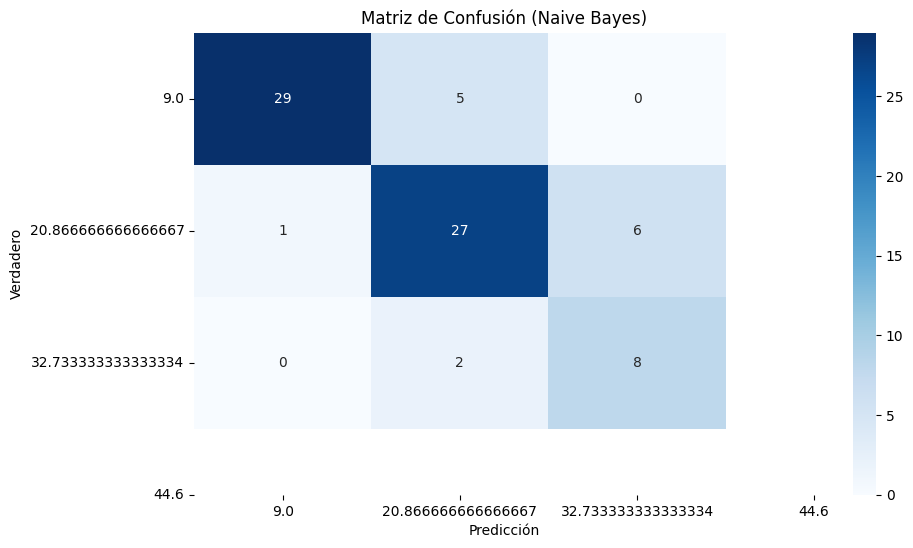

In [56]:
# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=discretizer.bin_edges_[0], yticklabels=discretizer.bin_edges_[0])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión (Naive Bayes)')
plt.show()

# EVALUACIÓN

## Validación del modelo de Regresión Arbol de Decisión

In [35]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo de Árbol de Decisión para Regresión:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Evaluación del modelo de Árbol de Decisión para Regresión:
Mean Squared Error (MSE): 10.458570093008936
Mean Absolute Error (MAE): 2.3085081430914767
R-squared (R2): 0.8176239086025607





---


*   El MSE mide el promedio de los errores cuadrados entre los valores predichos y los valores reales, en este modelo obtuvimos un MSE de 10.46 que es relativamente bajo, indicando que el modelo de árbol de decisión está realizando predicciones bastante precisas.
*   El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales, nosotros obtuvimos un MAE de 2.31 lo que indica, en promedio, que las predicciones del modelo están a 2.31 unidades de los valores reales, indicando una buena precisión del modelo.
*   El coeficiente de determinación, indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes, nuestro resultado de 0.82 indica que el 82% de la variabilidad en el consumo de combustible puede ser explicada por nuestro modelo.



---



## Validación del modelo de Regresión Lineal Múltiple

In [43]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo de Regresión Lineal Múltiple:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Evaluación del modelo de Regresión Lineal Múltiple:
Mean Squared Error (MSE): 9.634434501429139
Mean Absolute Error (MAE): 2.3760644390145798
R-squared (R2): 0.8319951492824229


---


*   El MSE es de 9.63, lo que sugiere que el modelo tiene un error cuadrático medio relativamente bajo.
*   El MAE calculado es de 2.38, lo que indica que, en promedio, las predicciones del modelo tienen un error absoluto medio de alrededor de 2.38 unidades.
*   El R2 es de 0.83, lo que sugiere que alrededor del 83% de la variabilidad en la variable dependiente es explicada por las variables independientes en el modelo, indicando un buen ajuste del modelo.


---

## Validación del modelo de Clasificación Naive Bayes

In [57]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')

print("Evaluación del modelo Naive Bayes para Clasificación:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Evaluación del modelo Naive Bayes para Clasificación:
Accuracy: 0.8205128205128205
Precision: 0.8407814407814408
Recall: 0.8205128205128205


---
*   El accuracy indica la proporción de predicciones correctas en relación con el total de predicciones realizadas, el valor que obtuvimos de 0.82 nos indica que el modelo acierta aproximadamente el 82% de las veces al clasificar las muestras del conjunto de prueba.
*   La precisión representa la calidad de las predicciones positivas realizadas por el modelo, en nuestro caso, el 0.84 obtenido indica que el modelo tiene pocas falsas alarmas, es decir, que cuando predice que una muestra pertenece a una clase, es probable que sea correcta.
*   Recall mide la capacidad del modelo para encontrar todas las muestras positivas, nuestro modelo obtuvo un 0.82 indicando que se puede identificar efectivamente la mayoría de las muestras positivas en el conjunto de datos.
---

In [58]:
# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nb, target_names=[f'Clase {i}' for i in range(3)]))


Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.97      0.85      0.91        34
     Clase 1       0.79      0.79      0.79        34
     Clase 2       0.57      0.80      0.67        10

    accuracy                           0.82        78
   macro avg       0.78      0.82      0.79        78
weighted avg       0.84      0.82      0.83        78



---
El reporte de clasificación de nuestro modelo obtuvo los siguientes resultados para cada una de nuestas clases
En cuanto a precisión se obtuvo:
*   Para la Clase 0, la precisión es del 97%, lo que significa que el 97% de las instancias clasificadas como Clase 0 por el modelo son realmente "Clase 0".
*   Para la Clase 1, la precisión es del 79%, lo que indica que el 79% de las instancias clasificadas como Clase 1 por el modelo son realmente Clase 1.
*   Para la Clase 2, la precisión es del 57%, lo que significa que el 57% de las instancias clasificadas como Clase 2 por el modelo son realmente Clase 2.

El recall indica:
* Para la Clase 0 el recall es del 85%, lo que indica que el modelo identificó correctamente el 85% de todas las instancias que realmente pertenecen a esa clase.
* Para la Clase 1 el recall es del 79%, lo que indica que el modelo identificó correctamente el 79% de todas las instancias que realmente pertenecen a esa clase.
* Para la Clase 2 el recall es del 80%, lo que indica que el modelo identificó correctamente el 80% de todas las instancias que realmente pertenecen a esa clase.

El F1-Score nos dice:
* La Clase 0 obtuvo un 91% lo que indica que tiene un buen equilibrio entre precisión y exhaustividad.
* La Clase 1 obtuvo un 79% lo que indica que el modelo tiene un rendimiento ligeramente inferior en términos de precisión y exhaustividad para esta clase
* La Clase 2 obtuvo un 67% el más bajo entre las tres clases.

Finalmente, Support nos muestra lo siguiente:
* En la Clase 0 nos indica que hay 34 muestras en el conjunto de prueba que pertenecen a esa misma clase.
* En la Clase 1 al igual que la Clase 0 tiene 34 muestras.
* En la Clase 2 hay 10 muestras en el conjunto de prueba que pertenecen a esta clase, lo cual es bajo en comparación con las otras clases, lo que indica que hay menos instancias de esta clase en el conjunto de datos de prueba.
---

In [59]:
from sklearn.decomposition import PCA

In [60]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

In [61]:
# Crear un dataframe para la visualización
visualization_df = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
visualization_df['Actual'] = y_test
visualization_df['Predicted'] = y_pred_nb

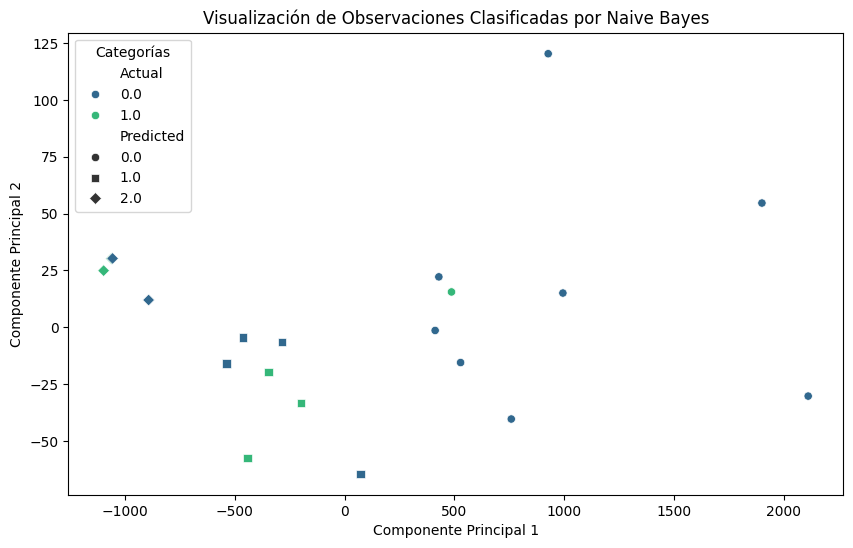

In [62]:
# Graficar las observaciones en el espacio reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Actual', style='Predicted', data=visualization_df, palette='viridis', markers=['o', 's', 'D'])
plt.title('Visualización de Observaciones Clasificadas por Naive Bayes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='best', title='Categorías')
plt.show()